In [44]:
# Load packages and libraries
import os 
import numpy as np 
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [45]:
raw_data=pd.read_csv(Path('DATA\\loan_data.csv'),dtype=str)
raw_data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116,0-200,5-7 Years,Male,No,Property - Real Estate,47,House Owner,Services,No,No
1,No Data,critical,TV,2438,No Data,7+ Years,Male,No,Savings Account,52,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144,0-200,2-5 Years,Male,No,Vehicle,48,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073,No Data,2-5 Years,Married,No,Vehicle,25,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276,No Data,7+ Years,Male,No,No Security,59,Renting,Services,No,No


In [41]:
# Check for missing values
raw_data.isnull().sum()

Type of Account          0
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       0
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [43]:
#check if the missing rows are the same for each the features
raw_data[raw_data['Individual Stauts'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,43,House Owner,Services,No,NaN
1005,nan,NaN,NaN,1765,0-201,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Delete the NULL values
raw_data = raw_data.dropna(subset = ['Individual Stauts'])

print(raw_data.shape)
raw_data.isnull().sum()

(1001, 14)


Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [49]:
# Investigate all the elements within each Feature 
for column in raw_data:
    unique_values = np.unique(raw_data[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Type of Account is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History is: 3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature Reason for the Loan is: 10 -- ['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
The number of values for feature Loan Amount is: 911
The number of values for feature Account Savings is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature Employment History is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature Individual Stauts is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature Other Loans is: 2 -- ['No' 'Yes']
The number of values for feature Security / Collateral is: 4 -- ['No Security' 'Property - Real Estat

In [ ]:
#pairplot of continuous 
g = sns.pairplot(raw_data[['Loan Amount', 'Age']],hue='Good Loan')



# Data Cleaning

In [ ]:
# Deleting the outlier
raw_data = raw_data[raw_data['Age'] < 100]
raw_data.shape

In [ ]:
# pairplot by outcome
g = sns.pairplot(raw_data, hue = 'Good Loan')

<AxesSubplot:xlabel='Good Loan', ylabel='count'>

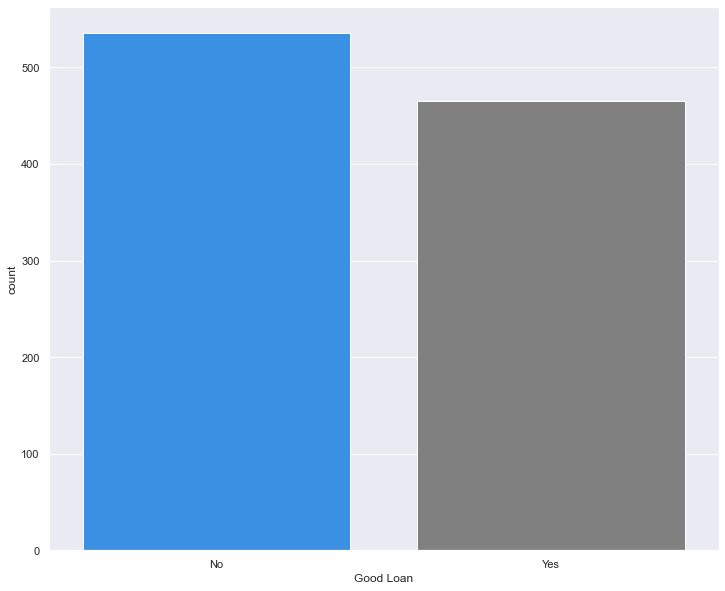

In [60]:
# Investigating the distr of y
sns.countplot(x = 'Good Loan', data = raw_data, palette=('dodgerblue','gray'))

In [ ]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = ('dodgerblue','gray'), hue = 'Good Loan')
    plt.show()

In [63]:
# encoding categorical variables 

new_raw_data = pd.get_dummies(raw_data, columns = features)

print(raw_data.shape)
print(new_raw_data.shape)

# Creating a new 0-1 y variable
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0

# Visualizing the data
new_raw_data.head()

(1001, 14)
(1001, 50)


C:\Users\marth\AppData\Local\Temp\ipykernel_23280\801748735.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
C:\Users\marth\AppData\Local\Temp\ipykernel_23280\801748735.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116,47,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438,52,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144,48,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073,25,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276,59,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


# Feature Selection

In [65]:
from sklearn.ensemble import RandomForestClassifier
X = new_raw_data.drop('Good Loan', axis = 1).values
y = new_raw_data['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)


seed=42 
rf = RandomForestClassifier(random_state=seed)
rf.fit(X,y)

(1001, 49)
(1001,)


RandomForestClassifier(random_state=42)

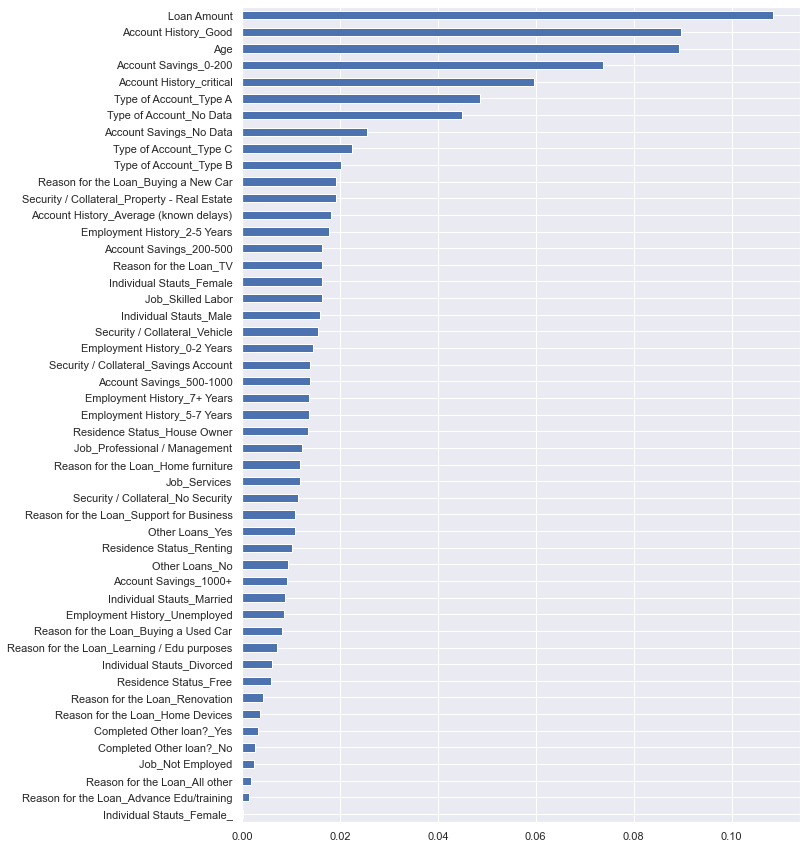

In [66]:
feat_importances = pd.Series(rf.feature_importances_, index=new_raw_data.drop('Good Loan', axis=1).columns)
feat_importances.sort_values().plot(kind='barh',figsize=(10,15))
plt.show()

##can remove some of the features with low feature importance

# Model Building

In [69]:
#split into train and test to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(700, 49)
(301, 49)
(700,)
(301,)


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
#kf = KFold(n_splits=3, random_state=0, shuffle=True)
C_List = np.geomspace(1e-5, 1e5, num=20)
# Logistic Reg CV
log_regcv = LogisticRegressionCV(random_state=seed, Cs = C_List)
log_regcv.fit(X_train, y_train)

pred_proba_t = log_regcv.predict_proba(X_test)
print("The optimal C parameter is: ", log_regcv.C_)

# Final Model

In [ ]:
log_reg_final = LogisticRegression(random_state=seed, C=20.691381)
log_reg_final.fit(X_test, y_test)

In [108]:
# predict - Predict class labels for samples in X
log_reg_final.predict(X_train)
y_pred = log_reg_final.predict(X_train)

print(y_pred[0:10])
# Probability estimates
pred_proba = log_reg_final.predict_proba(X_train)
print(pred_proba[0:10])
# Coefficient of the features in the decision function
#log_reg_final.coef_

[1 0 1 1 1 1 0 0 0 0]
[[0.208931 0.791069]
 [0.720948 0.279052]
 [0.133948 0.866052]
 [0.498013 0.501987]
 [0.101189 0.898811]
 [0.254182 0.745818]
 [0.815993 0.184007]
 [0.870565 0.129435]
 [0.711495 0.288505]
 [0.917161 0.082839]]


array([[-0.000088, 0.014341, -1.327090, 1.034105, 0.465806, -0.273890,
        -0.158903, 1.356579, -1.298745, 0.096039, -0.022601, -0.568740,
        0.737986, 0.103411, 0.228245, -0.164522, -0.179675, -0.369149,
        0.037938, -1.493141, 0.425251, -0.055285, 0.365986, 0.656120,
        0.006954, -0.297441, 0.565807, -0.351162, -0.025227, 0.082476,
        -0.592332, 0.000000, 0.345985, 0.062803, -0.339570, 0.238501,
        -0.745466, 0.357244, 0.044969, 0.242184, -0.432573, 0.312418,
        0.019086, -0.108469, 0.306475, -0.035280, -0.263794, -0.165552,
        0.064483]])

# Evaluate Model

In [110]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg_final.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg_final.score(X_test, y_test))

# Classification Report
print(classification_report(y_train, y_pred))
cm = confusion_matrix(y_train, y_pred)
print(cm)

The Training Accuracy is:  0.7342857142857143
The Testing Accuracy is:  0.8305647840531561
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       369
           1       0.74      0.67      0.70       331

    accuracy                           0.73       700
   macro avg       0.74      0.73      0.73       700
weighted avg       0.73      0.73      0.73       700

[[292  77]
 [109 222]]
